In [1]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
votes = pd.read_csv("114_congress.csv")
votesNum = votes.copy()
columns = ["name","party","state"]
votesNum = votesNum.drop(columns,axis = 1)
print(votesNum.head())

   00001  00004  00005  00006  00007  00008  00009  00010  00020  00026  \
0    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    1.0   
1    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0    1.0   
2    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0   
3    0.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
4    0.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0   

   00032  00038  00039  00044  00047  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    1.0    0.0    1.0    0.0  
2    1.0    1.0    0.0    1.0    1.0  
3    0.0    0.0    1.0    0.0    0.0  
4    0.0    1.0    0.0    1.0    0.0  


In [3]:
print(votes['party'].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [4]:
print(euclidean_distances(votesNum.iloc[0].values.reshape(1, -1), votesNum.iloc[1].values.reshape(1, -1)))

distance = euclidean_distances(votesNum.iloc[0].values.reshape(1, -1), votesNum.iloc[2].values.reshape(1, -1))

print(distance)

[[1.73205081]]
[[3.31662479]]


In [5]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votesNum.iloc[:])

In [6]:
labels = kmeans_model.labels_

print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [7]:
cluster =  votes[(labels == 0) & (votes["party"] == "I")]
print(cluster)

democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]

print(democratic_outliers)

       name party state  00001  00004  00005  00006  00007  00008  00009  \
50     King     I    ME    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
79  Sanders     I    VT    1.0    0.0    0.0    1.0    0.0    1.0    0.0   

    00010  00020  00026  00032  00038  00039  00044  00047  
50    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0  
79    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0  
        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


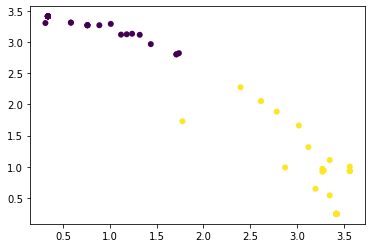

In [8]:
plt.scatter(x=senator_distances[:,0],y = senator_distances[:,1],c=labels,linewidths=0)

plt.show()

In [9]:
extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476